In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def data(path):
    data=pd.read_csv(path)
    #data=data.astype(int)#强制转换为int类型
    x=data.iloc[:,1:-1]#进行特征和标签的数据切片
    y=data.iloc[:,-1]
    
    
    #分测试集和训练集
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
    return x_train,x_test,y_train,y_test

In [7]:
x_train, x_test, y_train, y_test = data(r"C:\Users\38061\Jupyter_Notebook\KNN_KMEAN\02.csv")

knn = KNeighborsClassifier(n_neighbors=5)

# 训练集 训练模型
knn.fit(x_train,y_train)

accuracy_train=knn.score(x_train, y_train)#评估-精确率
accuracy_test=knn.score(x_test, y_test)#评估-精确率
print(accuracy_train,accuracy_test)

0.9940439515300883 0.9837086727359846


In [8]:
y_train_pre=knn.predict(x_train)
y_test_pre=knn.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pre))
print(classification_report(y_test,y_test_pre))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1364
           1       1.00      1.00      1.00      3505

    accuracy                           0.99      4869
   macro avg       0.99      0.99      0.99      4869
weighted avg       0.99      0.99      0.99      4869

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       577
           1       0.99      0.99      0.99      1510

    accuracy                           0.98      2087
   macro avg       0.98      0.98      0.98      2087
weighted avg       0.98      0.98      0.98      2087



Text(0, 0.5, 'true label')

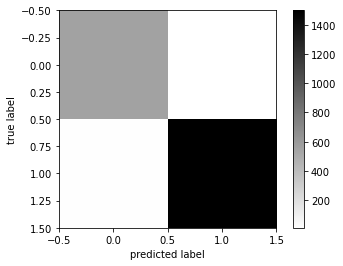

In [9]:
from sklearn import metrics
metrics.accuracy_score(y_test_pre, y_test)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(metrics.confusion_matrix(y_test_pre, y_test),
           interpolation='nearest', 
           cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label")

In [10]:
import joblib
joblib.dump(value=knn,filename="knnModel.gz",compress=True)

['knnModel.gz']